In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [13]:
data = pd.read_csv('AUBANK_minute.csv')

In [14]:
data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [15]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

In [16]:
data.isnull().sum() 

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [17]:
data = data[data["volume"] > 0] 
data.dropna(inplace=True)

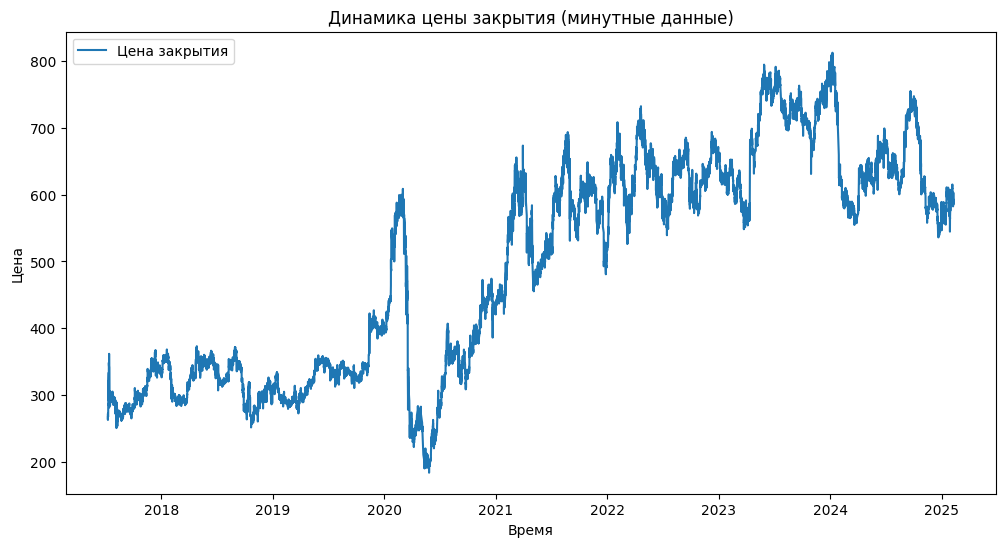

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["close"], label="Цена закрытия")
plt.title("Динамика цены закрытия (минутные данные)")
plt.xlabel("Время")
plt.ylabel("Цена")
plt.legend()
plt.show()

In [23]:
for i in range(1, 6):
    data[f'lag_{i}_close'] = data['close'].shift(i)
    
data = data.dropna().reset_index(drop=True)

features = ['open', 'high', 'low', 'volume'] + [f'lag_{i}_close' for i in range(1, 6)]
X = data[features].values.astype('float32')
Y = data['close'].values.astype('float32')

In [20]:
X = data[['open', 'high', 'low', 'volume'] + [f'lag_{i}_close' for i in range(1, 6)]]
Y = data['close']

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y.reshape(-1, 1))

In [25]:
test_size = 100
X_train, X_test = X_scaled[:-test_size], X_scaled[-test_size:]
Y_train, Y_test = Y_scaled[:-test_size], Y_scaled[-test_size:]

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

optimizer = SGD(learning_rate=0.001, momentum=0.0)
model.compile(optimizer=optimizer, loss='mse')

history = model.fit(X_train, Y_train, epochs=10, batch_size=128, verbose=1)

Y_pred_scaled = model.predict(X_test)
Y_pred = scaler.inverse_transform(Y_pred_scaled)
Y_test_actual = scaler.inverse_transform(Y_test)

Epoch 1/10
5350/5350 [==============================] - 6s 1ms/step - loss: 0.0077
Epoch 2/10
5350/5350 [==============================] - 6s 1ms/step - loss: 1.8226e-04
Epoch 3/10
5350/5350 [==============================] - 6s 1ms/step - loss: 7.5477e-05
Epoch 4/10
5350/5350 [==============================] - 5s 991us/step - loss: 4.1648e-05
Epoch 5/10
5350/5350 [==============================] - 5s 985us/step - loss: 3.9259e-05
Epoch 6/10
5350/5350 [==============================] - 5s 988us/step - loss: 4.5156e-05
Epoch 7/10
5350/5350 [==============================] - 5s 990us/step - loss: 2.7289e-05
Epoch 8/10
5350/5350 [==============================] - 5s 1ms/step - loss: 2.5455e-05
Epoch 9/10
5350/5350 [==============================] - 5s 992us/step - loss: 2.4381e-05
Epoch 10/10
4/4 [==============================] - 0s 997us/step


Text(0, 0.5, 'Loss')

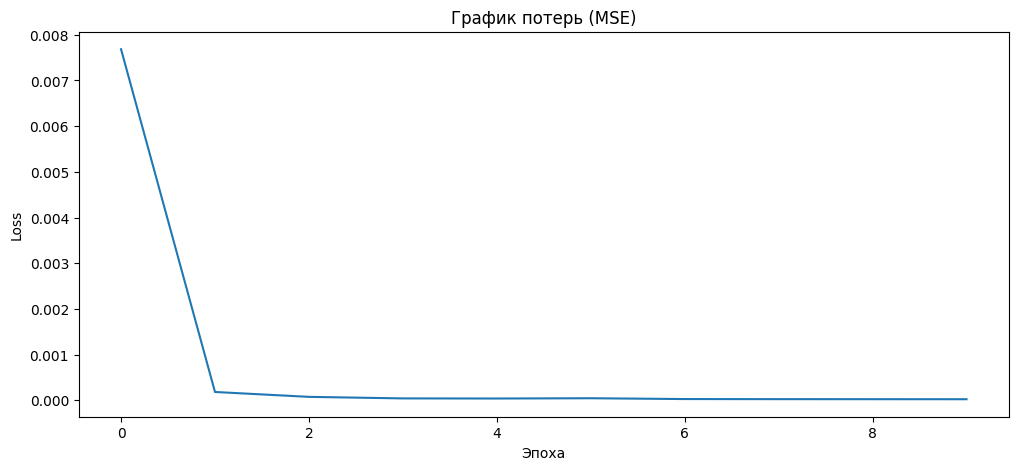

In [26]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'])
plt.title('График потерь (MSE)')
plt.xlabel('Эпоха')
plt.ylabel('Loss')

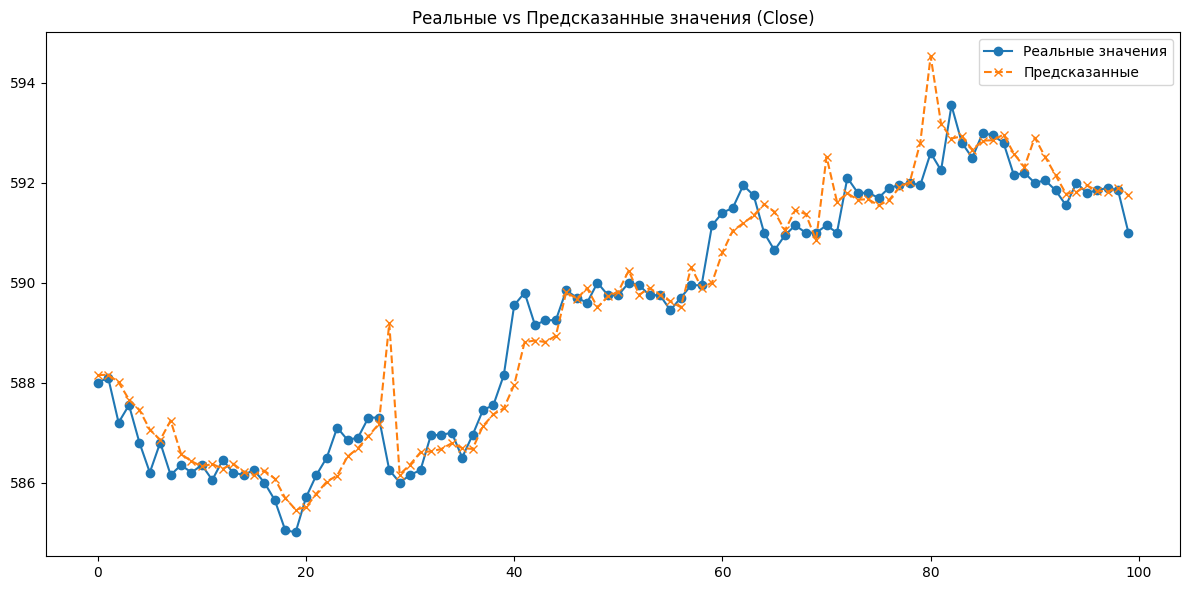

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(Y_test_actual, label='Реальные значения', marker='o')
plt.plot(Y_pred, label='Предсказанные', linestyle='--', marker='x')
plt.title('Реальные vs Предсказанные значения (Close)')
plt.legend()
plt.tight_layout()
plt.show()